In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork

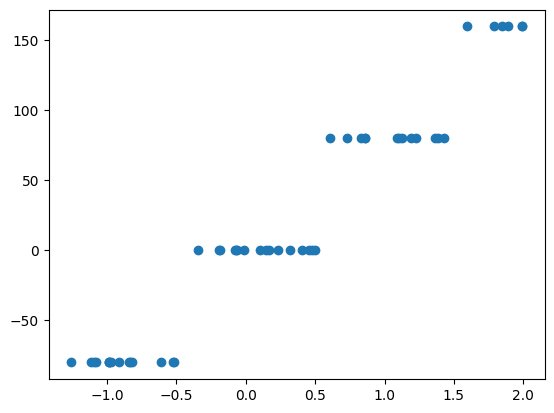

In [2]:
data_step_train = pd.read_csv("dane_nn2\steps-small-training.csv")
data_step_train = data_step_train.drop(data_step_train.columns[0], axis=1)
data_step_train.head()
X_step_train = data_step_train['x'].values.reshape(-1, 1)
y_step_train = data_step_train['y'].values.reshape(-1, 1)

plt.scatter(X_step_train, y_step_train)
plt.show()

Starting MSE: 6656.85
Epoch 0, MSE: 6656.85
Epoch 1000, MSE: 0.35
Epoch 2000, MSE: 0.34
Epoch 3000, MSE: 0.33
Epoch 4000, MSE: 0.33
Epoch 5000, MSE: 0.33
Epoch 6000, MSE: 0.33
Epoch 7000, MSE: 0.33
Epoch 8000, MSE: 0.33
Epoch 9000, MSE: 0.32
Epoch 10000, MSE: 0.32
Epoch 11000, MSE: 0.32
Epoch 12000, MSE: 0.32
Epoch 13000, MSE: 0.32
Epoch 14000, MSE: 0.32
Epoch 15000, MSE: 0.33
Epoch 16000, MSE: 0.33
Epoch 17000, MSE: 0.33
Epoch 18000, MSE: 0.33
Epoch 19000, MSE: 0.33
Epoch 20000, MSE: 0.33
Epoch 21000, MSE: 0.33
Epoch 22000, MSE: 0.33
Epoch 23000, MSE: 0.33
Epoch 24000, MSE: 0.33
Epoch 25000, MSE: 0.33
Epoch 26000, MSE: 0.33
Epoch 27000, MSE: 0.33
Epoch 28000, MSE: 0.33
Epoch 29000, MSE: 0.32
Epoch 30000, MSE: 0.32
Epoch 31000, MSE: 0.32
Epoch 32000, MSE: 0.32
Epoch 33000, MSE: 0.32
Epoch 34000, MSE: 0.32
Epoch 35000, MSE: 0.32
Epoch 36000, MSE: 0.32
Epoch 37000, MSE: 0.32
Epoch 38000, MSE: 0.32
Epoch 39000, MSE: 0.32
Epoch 40000, MSE: 0.32
Epoch 41000, MSE: 0.32
Epoch 42000, MSE: 0.32

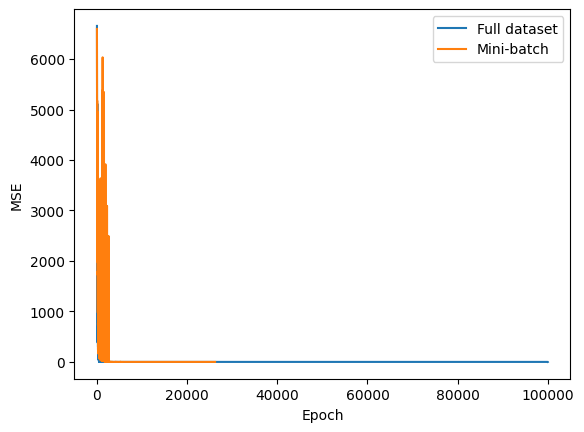

In [31]:
nn = NeuralNetwork(layers=[1, 10, 10, 1], activation_fun='sigmoid')
history, wh = nn.train(X_step_train, y_step_train, 0.1, int(1e5), stop_condition=0.001)

nn2 = NeuralNetwork([1, 10, 10, 1])
history_batch, whb = nn2.train(X_step_train, y_step_train, 0.01, int(1e5), mini_batch=True, batch_size=16, stop_condition=0.001)

plt.plot(history, label="Full dataset")
plt.plot(history_batch, label="Mini-batch")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

Full dataset MSE:  234.71366581404592
Mini-batch MSE:  89.6641024868813


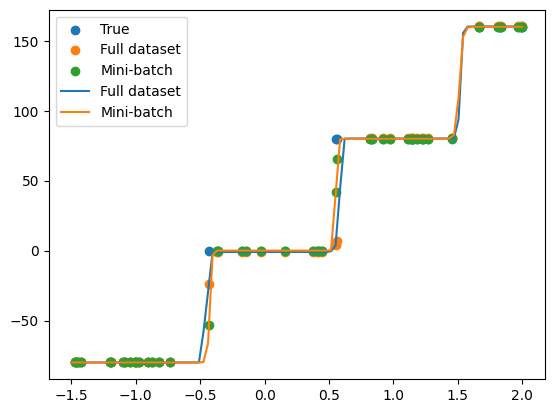

In [32]:
data_step_test = pd.read_csv("dane_nn2\steps-small-test.csv")
data_step_test = data_step_test.drop(data_step_test.columns[0], axis=1)
X_step_test = data_step_test['x'].values.reshape(-1, 1)
y_step_test = data_step_test['y'].values.reshape(-1, 1)

y_pred = nn.predict(X_step_test)
y_pred_batch = nn2.predict(X_step_test)

print("Full dataset MSE: ", np.mean((y_step_test - y_pred) ** 2))
print("Mini-batch MSE: ", np.mean((y_step_test - y_pred_batch) ** 2))

x = np.linspace(-1.5, 2, 100).reshape(-1, 1)

plt.scatter(X_step_test, y_step_test, label="True")
plt.scatter(X_step_test, y_pred, label="Full dataset")
plt.scatter(X_step_test, y_pred_batch, label="Mini-batch")
plt.plot(x, nn.predict(x), label="Full dataset")
plt.plot(x, nn2.predict(x), label="Mini-batch")
plt.legend()
plt.show()

In [3]:
data_square_train = pd.read_csv("dane_nn2\square-simple-training.csv")
data_square_train = data_square_train.drop(data_square_train.columns[0], axis=1)
data_square_train.head()
X_square_train = data_square_train['x'].values.reshape(-1, 1)
y_square_train = data_square_train['y'].values.reshape(-1, 1)

In [ ]:
nn_square = NeuralNetwork([1, 16, 32, 16, 1], activation_fun='sigmoid')
h1, wh1 = nn_square.train(X_square_train, y_square_train, 0.01, int(2e4), stop_condition=1)
h, wh1 = nn_square.train(X_square_train, y_square_train, 0.001, int(1e4), stop_condition=1)
h, wh1 = nn_square.train(X_square_train, y_square_train, 0.0001, int(1e4), stop_condition=1)
h, wh1 = nn_square.train(X_square_train, y_square_train, 0.00001, int(1e4), stop_condition=0.5)

nn_square2 = NeuralNetwork([1, 16, 32, 16, 1], activation_fun='sigmoid')
h2, wh2 = nn_square2.train(X_square_train, y_square_train, 0.01, int(2e4), mini_batch=True, batch_size=64, stop_condition=1)
h, wh2 = nn_square2.train(X_square_train, y_square_train, 0.001, int(1e4), mini_batch=True, batch_size=64, stop_condition=1)
h, wh2 = nn_square2.train(X_square_train, y_square_train, 0.0001, int(1e4), mini_batch=True, batch_size=64, stop_condition=1)
h, wh2 = nn_square2.train(X_square_train, y_square_train, 0.00001, int(1e4), mini_batch=True, batch_size=64, stop_condition=0.5)



# plt.plot(h1, label="Full dataset")
# plt.plot(h2, label="Mini-batch")
# plt.xlabel("Epoch")
# plt.ylabel("MSE")
# plt.legend()
# plt.show()


Starting MSE: 10071.15
Epoch 0, MSE: 10071.15
Epoch 1000, MSE: 9173.41
Epoch 2000, MSE: 9173.45
Epoch 3000, MSE: 9173.47
Epoch 4000, MSE: 9173.47
Epoch 5000, MSE: 9173.49
Epoch 6000, MSE: 9173.51
Epoch 7000, MSE: 7935.59
Epoch 8000, MSE: 8640.21
Epoch 9000, MSE: 1701.71
Epoch 10000, MSE: 815.24
Epoch 11000, MSE: 745.37
Epoch 12000, MSE: 252.87
Epoch 13000, MSE: 170.29
Epoch 14000, MSE: 1158.98
Epoch 15000, MSE: 171.06
Epoch 16000, MSE: 259.74
Epoch 17000, MSE: 112.69
Epoch 18000, MSE: 564.76
Epoch 19000, MSE: 118.61
Final MSE: 1148.057801120417 after 20000 epochs
Starting MSE: 955.33
Epoch 20000, MSE: 955.33
Epoch 21000, MSE: 2.13
Epoch 22000, MSE: 1.81
Epoch 23000, MSE: 1.57
Epoch 24000, MSE: 1.32
Epoch 25000, MSE: 1.18
Epoch 26000, MSE: 1.03
Final MSE: 0.9991176245130865 after 26221 epochs
Starting MSE: 1.00
Final MSE: 0.9991176245130865 after 26222 epochs
Starting MSE: 1.00
Epoch 26222, MSE: 1.00
Epoch 27222, MSE: 0.79
Epoch 28222, MSE: 0.70
Epoch 29222, MSE: 0.63
Epoch 30222, MSE: 

MSE for full:  14.432176480514036
MSE for mini-batch:  3.664883318256212


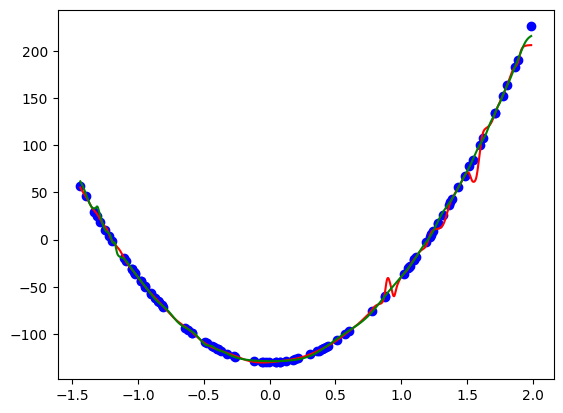

In [13]:
data_square_test = pd.read_csv("dane_nn2\square-simple-test.csv")
data_square_test = data_square_test.drop(data_square_test.columns[0], axis=1)
data_square_test.head()
X_square_test = data_square_test['x'].values.reshape(-1, 1)
y_square_test = data_square_test['y'].values.reshape(-1, 1)

y_square_pred = nn_square.predict(X_square_test)
mse_square = np.mean(np.square(y_square_test - y_square_pred))
print("MSE for full: ", mse_square)

y_square_pred2 = nn_square2.predict(X_square_test)
mse_square2 = np.mean(np.square(y_square_test - y_square_pred2))
print("MSE for mini-batch: ", mse_square2)

x = np.linspace(min(X_square_test), max(X_square_test), 1000)
plt.scatter(X_square_test, y_square_test, color='blue')
plt.plot(x, nn_square.predict(x), color='red')
plt.plot(x, nn_square2.predict(x), color='green')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


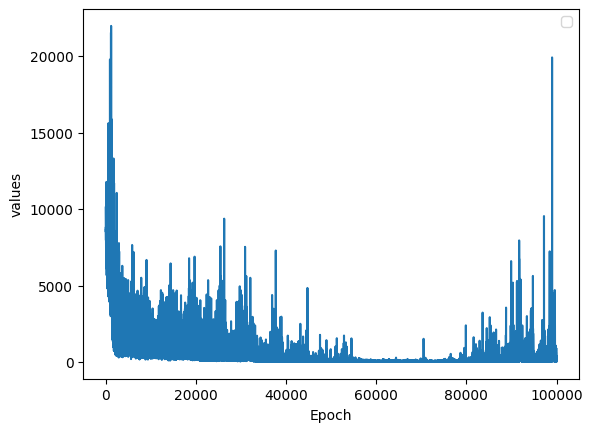

In [9]:
plt.plot(h1)
plt.xlabel("Epoch")
plt.ylabel("values")
plt.legend()
plt.show()

In [11]:
multimodal_train = pd.read_csv("dane_nn2\multimodal-large-training.csv")
multimodal_train.head()
X_multimodal_train = multimodal_train['x'].values.reshape(-1, 1)
y_multimodal_train = multimodal_train['y'].values.reshape(-1, 1)

In [14]:
nn_multimodal = NeuralNetwork([1, 32, 64, 32, 1], activation_fun='sigmoid')
h1, wh1 = nn_multimodal.train(X_multimodal_train, y_multimodal_train, 0.02, int(1e3), stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal.train(X_multimodal_train, y_multimodal_train, 0.01, int(1e3), stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal.train(X_multimodal_train, y_multimodal_train, 0.001, int(1e3), stop_condition=1, report_interval=10)

nn_multimodal2 = NeuralNetwork([1, 32, 64, 32, 1], activation_fun='sigmoid')
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.02, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.01, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.001, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)


# plt.plot(h1, label="Full dataset")
# plt.plot(h1, label="Mini-batch")
# plt.xlabel("Epoch")
# plt.ylabel("MSE")
# plt.legend()
# plt.show()



Starting MSE: 5386.43
Epoch 0, MSE: 5386.43
Epoch 10, MSE: 5085.60
Epoch 20, MSE: 4310.24
Epoch 30, MSE: 4974.63
Epoch 40, MSE: 4181.83
Epoch 50, MSE: 5095.21
Epoch 60, MSE: 3996.68
Epoch 70, MSE: 4601.83
Epoch 80, MSE: 3980.34
Epoch 90, MSE: 5528.17
Epoch 100, MSE: 3505.37
Epoch 110, MSE: 4327.27
Epoch 120, MSE: 4145.42
Epoch 130, MSE: 5420.43
Epoch 140, MSE: 3400.24
Epoch 150, MSE: 4064.64
Epoch 160, MSE: 4355.61
Epoch 170, MSE: 4227.36
Epoch 180, MSE: 3833.54
Epoch 190, MSE: 2871.59
Epoch 200, MSE: 4131.92
Epoch 210, MSE: 3595.60
Epoch 220, MSE: 4438.44
Epoch 230, MSE: 4287.80
Epoch 240, MSE: 4468.37
Epoch 250, MSE: 3957.29
Epoch 260, MSE: 3016.62
Epoch 270, MSE: 3548.44
Epoch 280, MSE: 3997.22
Epoch 290, MSE: 2977.82
Epoch 300, MSE: 4524.35
Epoch 310, MSE: 2859.63
Epoch 320, MSE: 2746.45
Epoch 330, MSE: 2758.23
Epoch 340, MSE: 3454.98
Epoch 350, MSE: 2782.06
Epoch 360, MSE: 3229.13
Epoch 370, MSE: 2942.97
Epoch 380, MSE: 3070.13
Epoch 390, MSE: 3011.08
Epoch 400, MSE: 3063.05
Epoch

c:\Users\barte\OneDrive\Pulpit\studia\SEM6\mio\nn2\nn.py:33: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 900, MSE: 41.21
Epoch 910, MSE: 59.65
Epoch 920, MSE: 59.07
Epoch 930, MSE: 62.62
Epoch 940, MSE: 50.10
Epoch 950, MSE: 59.26
Epoch 960, MSE: 65.52
Epoch 970, MSE: 68.58
Epoch 980, MSE: 83.10
Epoch 990, MSE: 70.95
Final MSE: 67.94474166198899
Starting MSE: 67.94
Epoch 0, MSE: 42.22
Epoch 10, MSE: 30.44
Epoch 20, MSE: 27.06
Epoch 30, MSE: 22.00
Epoch 40, MSE: 28.05
Epoch 50, MSE: 21.98
Epoch 60, MSE: 34.75
Epoch 70, MSE: 18.38
Epoch 80, MSE: 17.10
Epoch 90, MSE: 32.16
Epoch 100, MSE: 62.36
Epoch 110, MSE: 23.38
Epoch 120, MSE: 17.06
Epoch 130, MSE: 30.19
Epoch 140, MSE: 20.24
Epoch 150, MSE: 69.58
Epoch 160, MSE: 25.33
Epoch 170, MSE: 28.06
Epoch 180, MSE: 26.49
Epoch 190, MSE: 31.49
Epoch 200, MSE: 24.18
Epoch 210, MSE: 27.00
Epoch 220, MSE: 23.30
Epoch 230, MSE: 17.77
Epoch 240, MSE: 27.13
Epoch 250, MSE: 21.99
Epoch 260, MSE: 22.76
Epoch 270, MSE: 42.43
Epoch 280, MSE: 271.94
Epoch 290, MSE: 24.51
Epoch 300, MSE: 133.02
Epoch 310, MSE: 73.80
Epoch 320, MSE: 34.61
Epoch 330, MSE

In [18]:
h1, wh1 = nn_multimodal2.train(X_multimodal_train, y_multimodal_train, 0.0001, int(1e3), mini_batch=True, batch_size=128, stop_condition=1, report_interval=10)

Starting MSE: 16.09
Epoch 0, MSE: 13.42
Epoch 10, MSE: 13.35
Epoch 20, MSE: 13.32
Epoch 30, MSE: 13.37
Epoch 40, MSE: 13.25
Epoch 50, MSE: 13.32
Epoch 60, MSE: 13.25
Epoch 70, MSE: 13.33


KeyboardInterrupt: 

MSE:  10.485663703036769


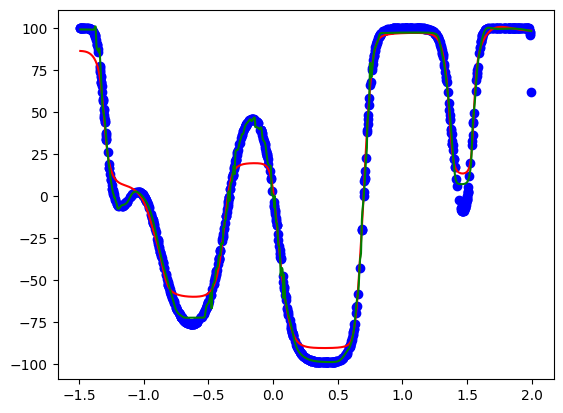

In [19]:
multimodal_test = pd.read_csv("dane_nn2\multimodal-large-test.csv")
multimodal_test.head()
X_multimodal_test = multimodal_test['x'].values.reshape(-1, 1)
y_multimodal_test = multimodal_test['y'].values.reshape(-1, 1)

y_multimodal_pred = nn_multimodal2.predict(X_multimodal_test)
mse_multimodal = np.mean(np.square(y_multimodal_test - y_multimodal_pred))
print("MSE: ", mse_multimodal)

x = np.linspace(min(X_multimodal_test), max(X_multimodal_test), 1000)

plt.scatter(X_multimodal_test, y_multimodal_test, color='blue')
plt.plot(x, nn_multimodal.predict(x), color='red')
plt.plot(x, nn_multimodal2.predict(x), color='green')
plt.show()